In [1]:
import os
import numpy as np
import pandas as pd
import squidpy as sq
import mudata as mu

from matplotlib import pyplot as plt

In [2]:
path = os.path.join('..','..', 'data', 'sma')

In [7]:

ctdatas = {}
metdatas = {}
slides = pd.read_csv(os.path.join(path, "sma_meta.csv"), index_col=0).index
exp = "V11L12-109" # V11T17-102 V11L12-109 V11T16-085

for slide in slides:
    slide_path = os.path.join(path, exp, f"{exp}_{slide}", "output_data")
    ctdatas[slide] = mu.read_h5mu(os.path.join(slide_path, "sma.h5mu")).mod["deconv"]
    metdatas[slide] = mu.read_h5mu(os.path.join(slide_path, "sma.h5mu")).mod["msi"]
    
    ctdatas[slide].var.index = ctdatas[slide].var.index.str.replace("Cholinergic and monoaminergic neurons", "CAMN")
    

/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/dbdimitrov/miniconda3/envs/spiana/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/home/dbdi

In [8]:
dop_preds = ['OBDOP1', 'OBDOP2', 'MBDOP2', 'MBDOP1', 'CAMN', 'Dopamine']

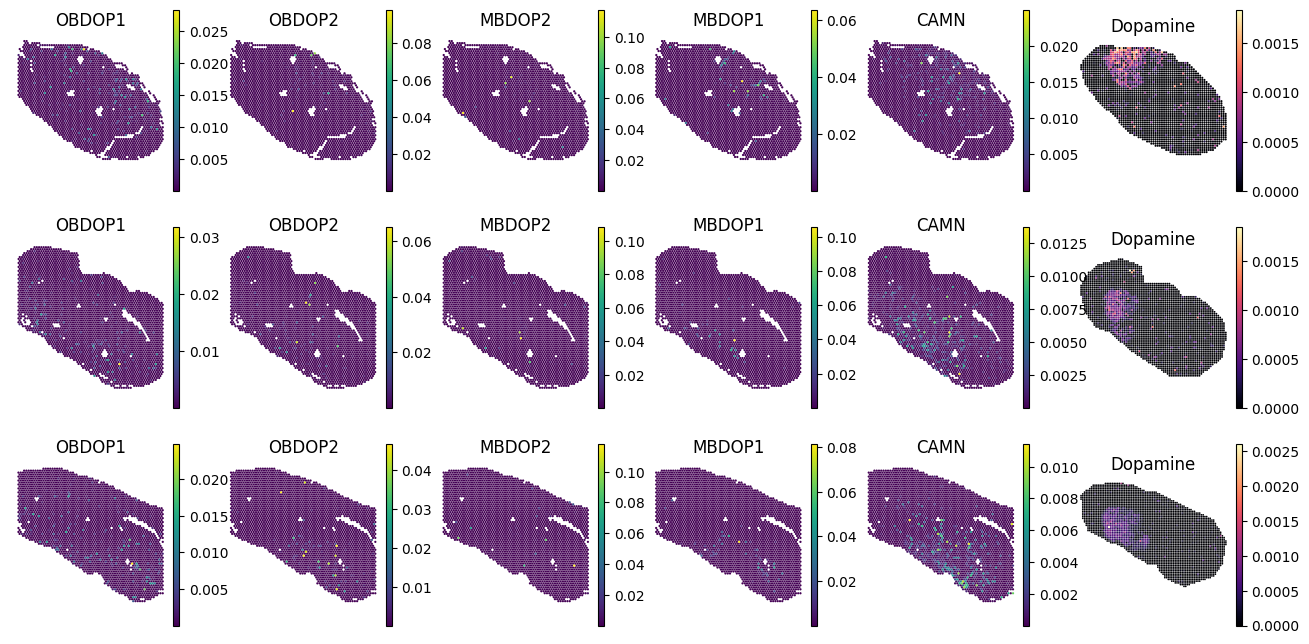

In [12]:
fig, axes = plt.subplots(3, 6, figsize=(16, 8))
axes = axes.flatten()
i = 0
for slide in slides:
    for pred in dop_preds:
        if pred != 'Dopamine':
            sq.pl.spatial_scatter(ctdatas[slide], color=pred, ncols=5, size=1.5, wspace=0, img=False, ax=axes[i], frameon=False)
        else:
            sq.pl.spatial_scatter(metdatas[slide], color=pred, ncols=5, size=1.5, wspace=0, img=False, ax=axes[i], frameon=False, cmap='magma')
            
        i += 1